In [1]:
import pandas as pd
import jieba
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis
import pyLDAvis.sklearn
import re                                #正则表达式，可用于匹配中文文本
import collections
import matplotlib.pyplot as plt


df = pd.read_csv("一级评论5.csv", encoding='utf-8') 


print(df.head())
print(len(df))



                                content
0                       医学伦理学他们是挂科了么？？！
1                               三个婴儿怎么办
2                                判的有点短啊
3              基因编辑婴儿会怎么样……好可怕请保护好那三个孩子
4  这么大的事，只由3个人就全部扛完了，处理结果真是出人意料，厉害厉害👍👍👍
78


In [2]:
df = df.dropna() #去除空值所在的整条(行)数据
print(len(df))

78


In [3]:
# 创建停用词list
def stopwordslist(filepath):
    stopwords = [line.strip()for line in open(filepath,'r',encoding='utf-8').readlines()]
    return stopwords


In [4]:
# 对句子去除停用词
def movestopwords(sentence):
    stopwords = stopwordslist('scu_stopwords.txt')
    outstr = ''
    for word in sentence:
        if word not in stopwords:
            if word != '\t':
                outstr += word #outstr += " "
    return outstr


In [5]:
# 分词函数
def chinese_word_cut(mytext):
    import jieba.posseg as psg
    checkarr = ['n']
    returnmsg = "".join([(x.word) for x in psg.cut(mytext) if (x.flag in checkarr)])
    return returnmsg



In [6]:
 # 分词结果  
df = df.content.apply(chinese_word_cut)
ff = df.apply(movestopwords)
print(ff) #预览


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.768 seconds.
Prefix dict has been built succesfully.


0           医学科
1            婴儿
2            有点
3      基因编辑婴儿孩子
4     事个人全部处理结果
        ...    
73        试验品孩子
74             
75         热心网友
76         理想阴影
77             
Name: content, Length: 78, dtype: object


In [7]:
word_counts = collections.Counter(ff) # 对分词做词频统计

word_counts_top10 = word_counts.most_common(11) # 获取前11最高频的词

word_counts_top10 = word_counts_top10[1:10]
print (word_counts_top10) 

[('孩子', 8), ('婴儿', 4), ('有点', 2), ('医学科', 1), ('基因编辑婴儿孩子', 1), ('事个人全部处理结果', 1), ('孩子信息', 1), ('孩子国家世界', 1), ('医院', 1)]


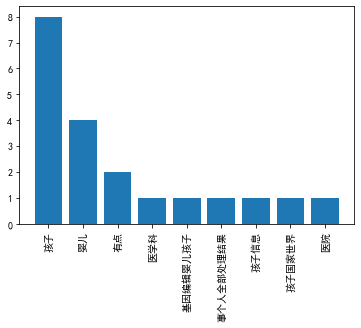

In [8]:
from pylab import *
mpl.rcParams['font.sans-serif']=['SimHei']

wa=dict(word_counts_top10)
plt.bar(wa.keys(),wa.values())
plt.xticks(rotation=90)
plt.show()

In [9]:
#从文件导入停用词表
stpwrdpath = "scu_stopwords.txt"
stpwrd_dic = open(stpwrdpath, 'rb')
stpwrd_content = stpwrd_dic.read().decode('utf-8')#将停用词表转换为list
stpwrdlst = stpwrd_content.splitlines()
stpwrd_dic.close()



In [10]:
# 调用sklearn机器学习包进行向量化
n_features = 1000 # 指定特征关键词提取最大值
tf_vectorizer = CountVectorizer(strip_accents='unicode',# 去除raw document中的重音符号
    max_features=n_features,#stop_words='english', # 停用词
    stop_words=stpwrdlst,
    max_df=0.5, # 阈值如果某个词的document frequence大于max_df，不当作关键词.float，词出现的次数与语料库文档数的百分比，int出现次数
    min_df=1) # 如果某个词的document frequence小于min_df，则这个词不会被当作关键词


tf = tf_vectorizer.fit_transform(df)
print(tf)
print('\nvocabulary list:\n\n',tf_vectorizer.get_feature_names())
print( '\nvocabulary dic :\n\n',tf_vectorizer.vocabulary_)

  (0, 12)	1
  (1, 24)	1
  (2, 39)	1
  (3, 21)	1
  (4, 3)	1
  (5, 29)	1
  (6, 30)	1
  (7, 15)	1
  (8, 55)	1
  (9, 25)	1
  (10, 14)	1
  (11, 48)	1
  (12, 35)	1
  (13, 9)	1
  (14, 13)	1
  (15, 28)	1
  (16, 28)	1
  (18, 31)	1
  (19, 10)	1
  (20, 28)	1
  (21, 7)	1
  (22, 18)	1
  (23, 34)	1
  (24, 38)	1
  (25, 8)	1
  :	:
  (49, 47)	1
  (50, 39)	1
  (52, 28)	1
  (53, 4)	1
  (54, 52)	1
  (55, 46)	1
  (56, 32)	1
  (57, 24)	1
  (58, 17)	1
  (59, 24)	1
  (60, 28)	1
  (61, 33)	1
  (62, 50)	1
  (63, 51)	1
  (64, 11)	1
  (65, 36)	1
  (66, 23)	1
  (68, 37)	1
  (69, 24)	1
  (70, 28)	1
  (71, 5)	1
  (72, 6)	1
  (73, 53)	1
  (75, 42)	1
  (76, 43)	1

vocabulary list:

 ['下文', '世界', '事下文', '事个人全部处理结果', '事结果', '人员人员', '人类人伦事情良人', '人类基因艾滋病患者孩子基因孩子父母人类基因事', '人类基因问题人评论', '人类罪', '人类魔盒人类规则制度', '全人类敌', '医学科', '医生', '医者医生人医生害人', '医院', '发布会牢狱错孩子后果无辜孩子人权基因', '名婴儿', '基因人', '基因编辑专业人士读书事情', '基因编辑婴儿', '基因编辑婴儿孩子', '基因编辑婴儿行医有点刑法规定基因编辑人类罪名', '好孩子', '婴儿', '婴儿事', '婴儿婴儿编辑基因人类规律负面影响无法人类婴儿重点', '婴儿问题人', '孩子', '孩子信息', '孩子国家世界', 

In [11]:
# LDA操作
n_topics = 5 # 人为指定划分的主题数
lda = LatentDirichletAllocation(n_topics,learning_method='online',max_iter=50,random_state=0 )
lda.fit(tf)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=50,
                          mean_change_tol=0.001, n_components=5, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [12]:
# 显示主题关键词函数
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print('\nTopic Nr.%d:' % int(topic_idx + 1))
        print(''.join([feature_names[i] + ' ' + str(round(topic[i], 2)) + ' | ' for i in topic.argsort()[:-n_top_words - 1:-1]]))
n_top_words = 10 # 主题输出前20个关键词
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)





Topic Nr.1:
医者医生人医生害人 1.2 | 事下文 1.2 | 下文 1.2 | 人类魔盒人类规则制度 1.2 | 发布会牢狱错孩子后果无辜孩子人权基因 1.2 | 名婴儿 1.2 | 基因编辑婴儿 1.2 | 基因编辑婴儿孩子 1.2 | 科研 1.2 | 硬道理产物 1.2 | 

Topic Nr.2:
感觉丧尸 1.2 | 事结果 1.2 | 医院 1.2 | 婴儿问题人 1.2 | 魔盒 1.2 | 医生 1.2 | 时间媒体 1.2 | 人员人员 1.2 | 技术国家利益 1.2 | 人类罪 1.2 | 

Topic Nr.3:
孩子 8.14 | 超能力人 1.2 | 科学贡献 1.2 | 热心网友 1.2 | 编辑基因方向全世界基因人类事情概率 1.2 | 行医实质量刑条件原告程度罪杀人法制 1.2 | 孩子信息 1.2 | 人类基因问题人评论 1.2 | 悲剧 1.2 | 婴儿事 1.2 | 

Topic Nr.4:
婴儿婴儿编辑基因人类规律负面影响无法人类婴儿重点 1.2 | 全人类敌 1.2 | 步子蛋专家技术人孩子科学狂人 1.2 | 科学法律底线 1.2 | 基因编辑婴儿行医有点刑法规定基因编辑人类罪名 1.2 | 世界 1.2 | 理想阴影 1.2 | 技术角度意义人类绝症现实新人类人月球现实意义人人动手蠢事 1.2 | 超能力人 0.21 | 基因编辑婴儿孩子 0.21 | 

Topic Nr.5:
婴儿 4.18 | 有点 2.19 | 老师理论区别学医 1.2 | 畜牲人驱逐出境 1.2 | 事个人全部处理结果 1.2 | 基因人 1.2 | 感觉事 1.2 | 孩子 0.22 | 医学科 0.21 | 医院 0.21 | 


In [ ]:
import pyLDAvis
import pyLDAvis.gensim

data = pyLDAvis.sklearn.prepare(lda,tf,tf_vectorizer)

#让可视化可以在notebook内显示
pyLDAvis.show(data)



Note: if you're in the IPython notebook, pyLDAvis.show() is not the best command
      to use. Consider using pyLDAvis.display(), or pyLDAvis.enable_notebook().
      See more information at http://pyLDAvis.github.io/quickstart.html .

You must interrupt the kernel to end this command

Serving to http://127.0.0.1:8903/    [Ctrl-C to exit]


127.0.0.1 - - [30/Jun/2020 22:31:38] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [30/Jun/2020 22:31:38] "GET /LDAvis.css HTTP/1.1" 200 -
127.0.0.1 - - [30/Jun/2020 22:31:38] "GET /d3.js HTTP/1.1" 200 -
127.0.0.1 - - [30/Jun/2020 22:31:38] "GET /LDAvis.js HTTP/1.1" 200 -
